# Fake & Real News Detection

## Importing required Libraries

In [93]:
import numpy as np
import pandas as pd
import string

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#for processing and prediction
import nltk
from nltk.corpus import stopwords
from nltk import tokenize

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

## Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [4]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [5]:
df_fake.shape

(23481, 4)

In [6]:
df_true.shape

(21417, 4)

In [7]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [10]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [12]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Data Preprocessing and Cleaning

In [13]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Both datasets do not contain any NULL value

In [15]:
#Adding flag to track real and fake type
df_fake['target'] = 'fake'
df_true['target'] = 'true'

**1. Concatenating the both data files:**

In [16]:
#concatenating both files
df = pd.concat([df_fake, df_true]).reset_index(drop=True)

In [17]:
df.shape

(44898, 5)

In [18]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [19]:
df.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


**2. Now, shuffling the dataframe:**

In [21]:
df = shuffle(df)
df = df.reset_index(drop=True)

In [22]:
df.head()

,title,text,subject,date,target
0,WOW! HERE’S WHAT PRESIDENT TRUMP Accomplished ...,Here s what President #DonaldTrump has accompl...,politics,"Jan 27, 2017",fake
1,U.S. defense chief urges Pakistan to redouble ...,ISLAMABAD (Reuters) - U.S. Defense Secretary J...,worldnews,"December 4, 2017",true
2,Trump’s Own Running Mate Just Put Him To SHAM...,"In an appearance on NBC s Meet the Press, Mi...",News,"September 3, 2016",fake
3,WATCH: MSNBC Cuts Mic Of GOP Senator Lindsey G...,MSNBC s Casey Hunt was interviewing war-hawk a...,left-news,"Jul 11, 2017",fake
4,BUSTED! LIBERAL BRAINIACS Steal Trump Sign…In ...,This is just idiotic! A couple of liberal brai...,politics,"Sep 24, 2016",fake


**3. As the date column is not required for further analysis, drop column:**

In [23]:
df.drop(['date'], axis=1, inplace=True)

In [24]:
df.head()

,title,text,subject,target
0,WOW! HERE’S WHAT PRESIDENT TRUMP Accomplished ...,Here s what President #DonaldTrump has accompl...,politics,fake
1,U.S. defense chief urges Pakistan to redouble ...,ISLAMABAD (Reuters) - U.S. Defense Secretary J...,worldnews,true
2,Trump’s Own Running Mate Just Put Him To SHAM...,"In an appearance on NBC s Meet the Press, Mi...",News,fake
3,WATCH: MSNBC Cuts Mic Of GOP Senator Lindsey G...,MSNBC s Casey Hunt was interviewing war-hawk a...,left-news,fake
4,BUSTED! LIBERAL BRAINIACS Steal Trump Sign…In ...,This is just idiotic! A couple of liberal brai...,politics,fake


**4. Only text of an article is used for analysis, so we don't require Title column.** Thus drop the Title column

In [25]:
df.drop(['title'], axis=1, inplace=True)

In [26]:
df.head()

,text,subject,target
0,Here s what President #DonaldTrump has accompl...,politics,fake
1,ISLAMABAD (Reuters) - U.S. Defense Secretary J...,worldnews,true
2,"In an appearance on NBC s Meet the Press, Mi...",News,fake
3,MSNBC s Casey Hunt was interviewing war-hawk a...,left-news,fake
4,This is just idiotic! A couple of liberal brai...,politics,fake


**5. Converting text to lowercase**

In [27]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [28]:
df.head()

,text,subject,target
0,here s what president #donaldtrump has accompl...,politics,fake
1,islamabad (reuters) - u.s. defense secretary j...,worldnews,true
2,"in an appearance on nbc s meet the press, mi...",News,fake
3,msnbc s casey hunt was interviewing war-hawk a...,left-news,fake
4,this is just idiotic! a couple of liberal brai...,politics,fake


**6. Removing the punctuations**

In [29]:
def remove_p(txt):
    list = [char for char in txt if char not in string.punctuation]
    clean = ''.join(list)
    
    return clean

df['text'] = df['text'].apply(remove_p)

In [30]:
df.head()

,text,subject,target
0,here s what president donaldtrump has accompli...,politics,fake
1,islamabad reuters us defense secretary jim ma...,worldnews,true
2,in an appearance on nbc s meet the press mik...,News,fake
3,msnbc s casey hunt was interviewing warhawk an...,left-news,fake
4,this is just idiotic a couple of liberal brain...,politics,fake


**7. Removing the stopwords**

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop = stopwords.words('english')

In [33]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
df.head()

,text,subject,target
0,president donaldtrump accomplished first week ...,politics,fake
1,islamabad reuters us defense secretary jim mat...,worldnews,true
2,appearance nbc meet press mike pence promised ...,News,fake
3,msnbc casey hunt interviewing warhawk rino sen...,left-news,fake
4,idiotic couple liberal brainiacs decided steal...,politics,fake


## Exploring the Data

**1. Countplot of targets**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


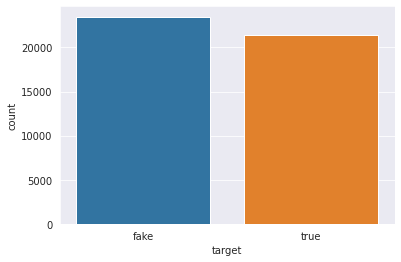

In [35]:
sns.set_style("darkgrid")
sns.countplot(df.target)

**2. Number of articles per subject**

In [36]:
print(df.groupby(['subject'])['text'].count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


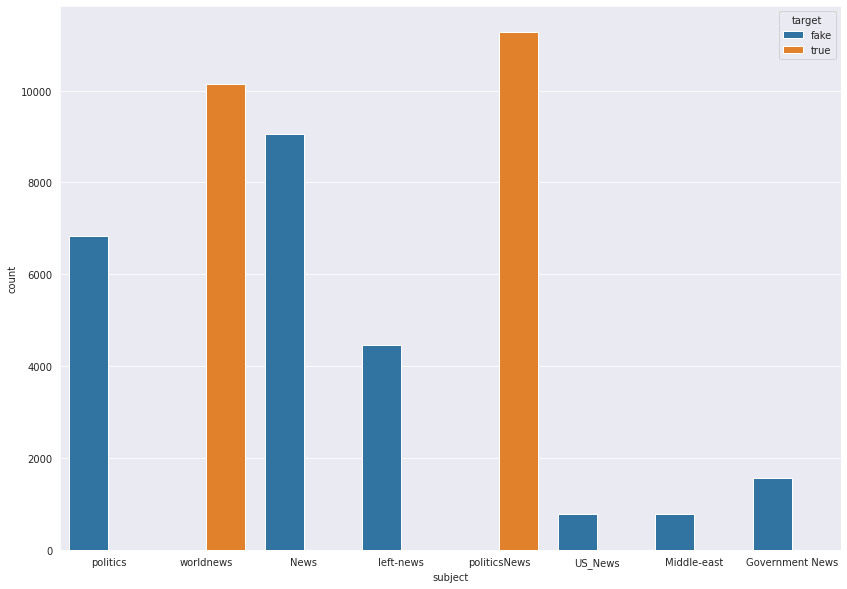

In [37]:
plt.figure(figsize=(14, 10))
plot = sns.countplot(x = 'subject', hue = 'target', data = df)

**3. Word counts of text**

In [38]:
df['text_length'] = df['text'].apply(lambda x : len(x.strip().split()))
df.head()

,text,subject,target,text_length
0,president donaldtrump accomplished first week ...,politics,fake,14
1,islamabad reuters us defense secretary jim mat...,worldnews,true,409
2,appearance nbc meet press mike pence promised ...,News,fake,223
3,msnbc casey hunt interviewing warhawk rino sen...,left-news,fake,172
4,idiotic couple liberal brainiacs decided steal...,politics,fake,32


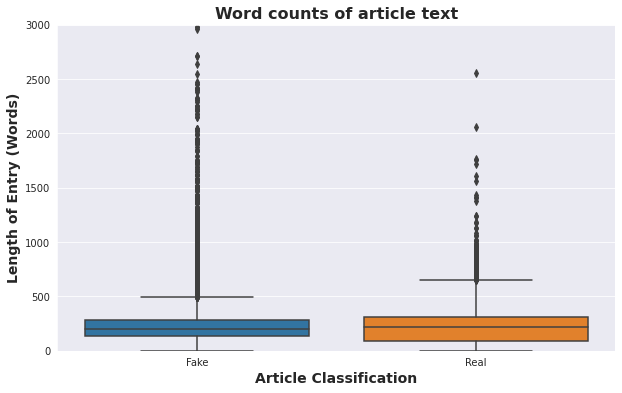

In [39]:
fig = plt.figure(figsize=(10, 6))
plt.title("Word counts of article text", fontsize=16, weight='bold')
ax = sns.boxplot(x="target", y="text_length", data=df)
ax.set_xticklabels(['Fake', 'Real'])
ax.set_xlabel("Article Classification", fontsize=14, weight='bold') 
ax.set_ylabel("Length of Entry (Words)", fontsize=14, weight='bold')
plt.ylim(0.0, 3000.0)
plt.show()

**4. Word Cloud**

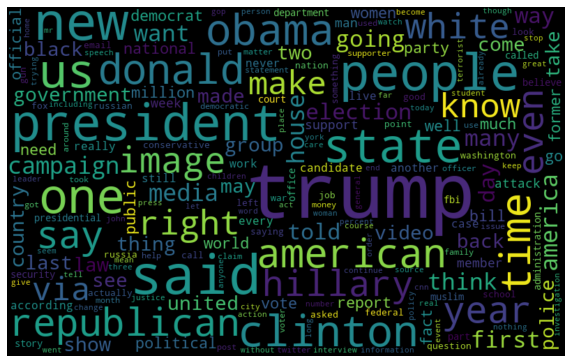

In [40]:
fake_df = df[df["target"] == "fake"]
all = ' '.join([text for text in fake_df.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

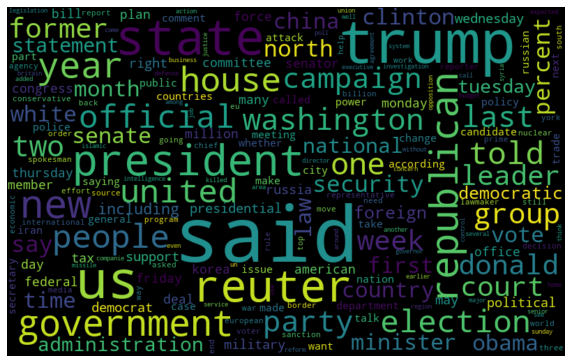

In [41]:
true_df = df[df["target"] == "true"]
all = ' '.join([text for text in true_df.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**5. Frequent words:**

In [51]:
token_space = tokenize.WhitespaceTokenizer()

def counter(txt, col_txt, quantity):
  all = ''.join(txt for txt in txt[col_txt])
  token_phrase = token_space.tokenize(all)

  freq = nltk.FreqDist(token_phrase)
  df_freq = pd.DataFrame({"Word": list(freq.keys()), "Frequency": list(freq.values())})
  df_freq = df_freq.nlargest(columns="Frequency", n=quantity)

  plt.figure(figsize=(14,10))
  fig = sns.barplot(data=df_freq, x="Word", y="Frequency", palette="summer")
  fig.set(ylabel="Count")
  plt.xticks(rotation="vertical")

  plt.show()

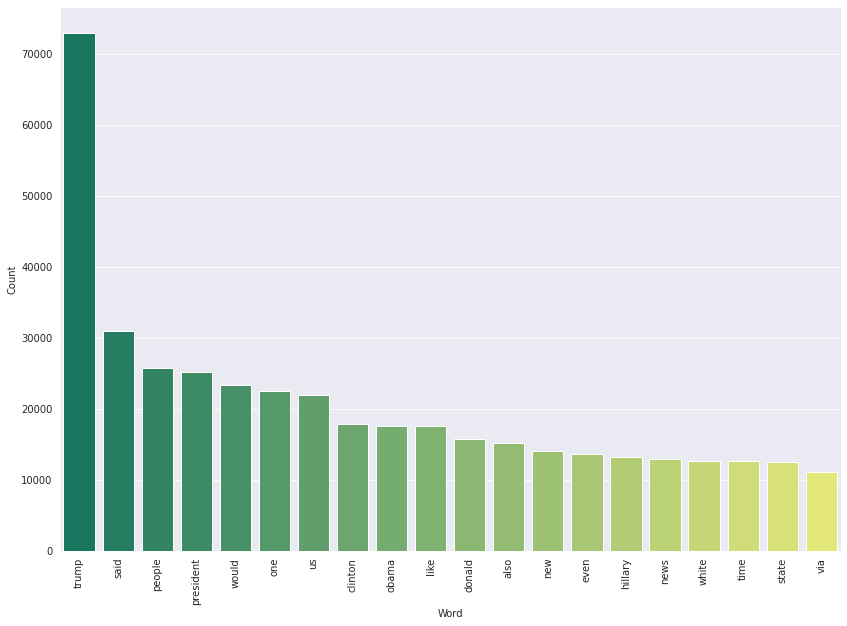

In [52]:
#frequent words in FAKE NEWS
counter(df[df["target"]=="fake"], "text", 20)

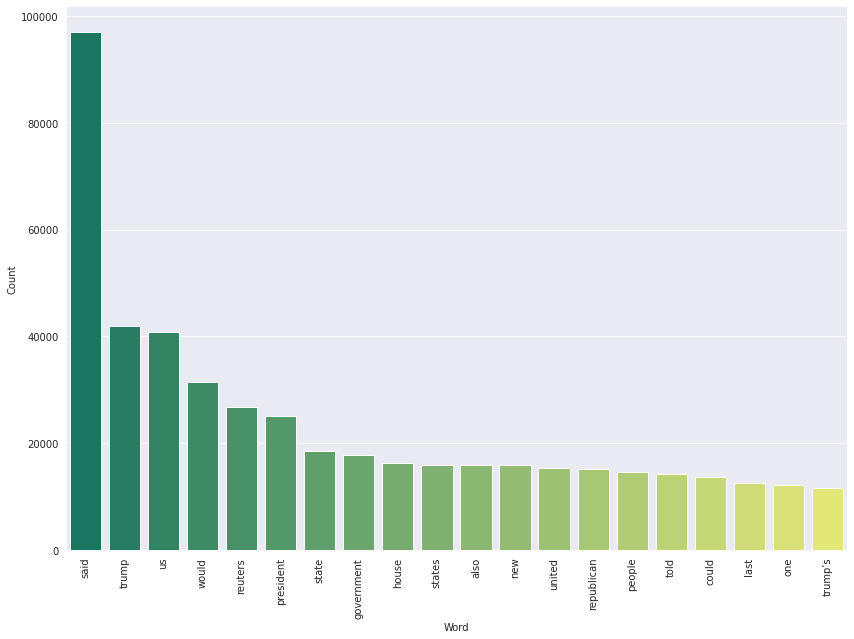

In [54]:
#frequent words in REAL NEWS
counter(df[df["target"]=="true"], "text", 20)

## Modeling for prediction

**Splitting the data**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df.target, test_size=0.2, random_state=42)

**Function to plot the Confision Matrix:**

In [69]:
#code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1. Logistic Regression model

In [60]:
from sklearn.linear_model import LogisticRegression

#vectorizing and using tfidf transformer
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression())])

In [61]:
#model fitting
model = pipe.fit(X_train, y_train)

In [63]:
#prediction
prediction_LR = model.predict(X_test)

Accuracy: 98.93%
Confusion matrix, without normalization


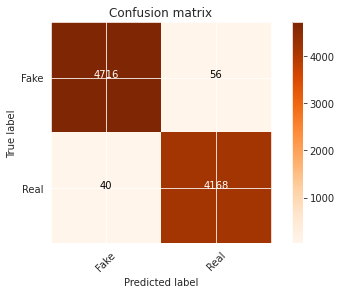

In [70]:
#result and confusion matrix
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_LR)*100,2)))

cm = metrics.confusion_matrix(y_test, prediction_LR)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [94]:
CR = classification_report(y_test, prediction_LR)
print(CR)

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4772
        true       0.99      0.99      0.99      4208

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### 2. Decision Tree Classifier model

In [71]:
from sklearn.tree import DecisionTreeClassifier

#vectorizing and using tfidf transformer
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy', max_depth = 20,
                                                  splitter='best', random_state=42))])

In [72]:
#model fitting
model = pipe.fit(X_train, y_train)

In [73]:
#prediction
prediction_DT = model.predict(X_test)

Accuracy: 99.69%
Confusion matrix, without normalization


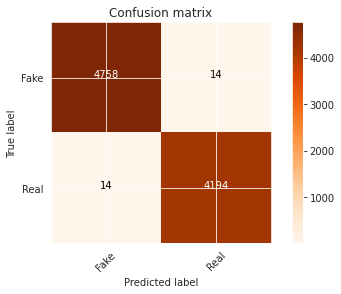

In [74]:
#result and confusion matrix
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_DT)*100,2)))

cm = metrics.confusion_matrix(y_test, prediction_DT)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [95]:
CR = classification_report(y_test, prediction_DT)
print(CR)

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4772
        true       1.00      1.00      1.00      4208

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### 3. Random Forest Classifier model

In [75]:
from sklearn.ensemble import RandomForestClassifier

#vectorizing and using tfidf transformer
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

In [76]:
#model fitting
model = pipe.fit(X_train, y_train)

In [79]:
#prediction
prediction_RF = model.predict(X_test)

Accuracy: 98.89%
Confusion matrix, without normalization


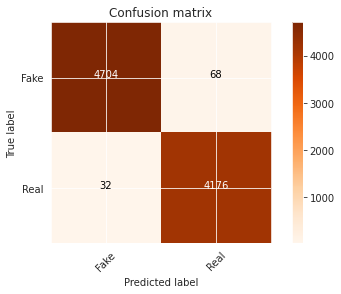

In [80]:
#result and confusion matrix
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_RF)*100,2)))

cm = metrics.confusion_matrix(y_test, prediction_RF)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [96]:
CR = classification_report(y_test, prediction_RF)
print(CR)

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4772
        true       0.98      0.99      0.99      4208

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### 4. Support Vector Machine Algorithm

In [89]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC(C=1, max_iter=500))])

In [90]:
#Model fitting
model = pipe.fit(X_train, y_train)

In [91]:
#prediction
prediction_SV = model.predict(X_test)

Accuracy: 99.64%
Confusion matrix, without normalization


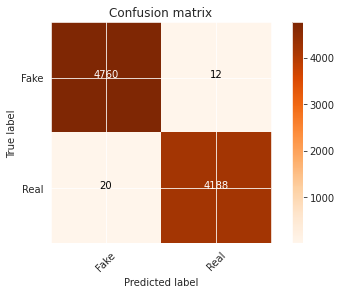

In [92]:
#result and confusion matrix
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_SV)*100,2)))

cm = metrics.confusion_matrix(y_test, prediction_SV)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [97]:
CR = classification_report(y_test, prediction_SV)
print(CR)

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4772
        true       1.00      1.00      1.00      4208

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## Evaluation

In [100]:
models = pd.DataFrame({
      'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'Support Vector Machines' ],

      'Score_test': [round(accuracy_score(y_test, prediction_LR)*100,2), round(accuracy_score(y_test, prediction_DT)*100,2), 
                     round(accuracy_score(y_test, prediction_RF)*100,2), round(accuracy_score(y_test, prediction_SV)*100,2)]
                    })

In [101]:
models.sort_values(by=['Score_test'], ascending=False)

,Model,Score_test
1,Decision Tree Classifier,99.69
3,Support Vector Machines,99.64
0,Logistic Regression,98.93
2,Random Forest,98.89


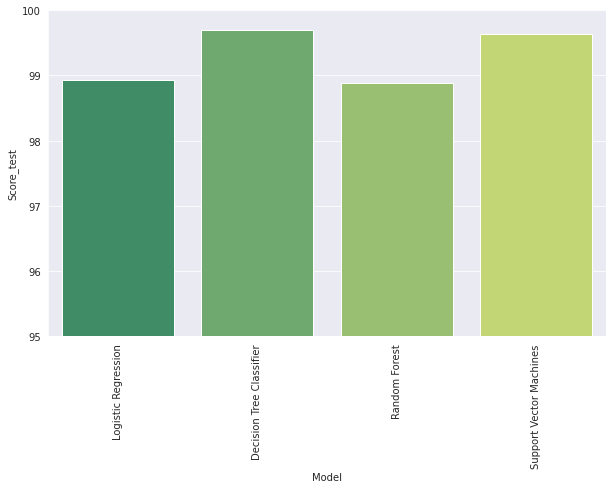

In [111]:
plt.figure(figsize=(10,6))
fig = sns.barplot(data=models, x="Model", y="Score_test", palette="summer")

fig.set(ylim=(95, 100))
plt.xticks(rotation="vertical")

plt.show()

**The Decision Tree model gives highest accuracy of 99.69.**

The other models also give accuracy near to 99%.

Thus, the models are efficient to detect the fake and real news.